In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
trainY.shape

(60000,)

In [22]:
trainX=trainX.reshape(-1,28,28,1)
testX=testX.reshape(-1,28,28,1)

In [7]:
trainX.shape

(60000, 28, 28, 1)

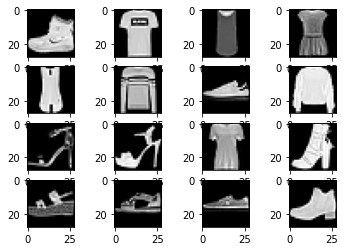

In [15]:
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(trainX[c].reshape(28,28),cmap='gray')

plt.show()

In [37]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding="same"),
                           tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64,padding="same"),
                           tf.keras.layers.MaxPool2D(strides=(2,2)),
                           tf.keras.layers.Dropout(rate=0.5),
                           tf.keras.layers.MaxPool2D(strides=(2,2)),
                           tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128,padding="same",activation='relu'),
                           tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256,padding="same",activation='relu'),
                           tf.keras.layers.MaxPool2D(strides=(2,2)),
                           tf.keras.layers.Dropout(rate=0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=512,activation='relu'),
                           tf.keras.layers.Dropout(rate=0.5),
                           tf.keras.layers.Dense(units=256,activation="relu"),
                           tf.keras.layers.Dropout(rate=0.5),
                           tf.keras.layers.Dense(units=10,activation='softmax')

])

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)        

In [40]:
history=model.fit(trainX,trainY,epochs=10,validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1644 - accuracy: 0.6655 - val_loss: 0.7335 - val_accuracy: 0.7455
Epoch 2/10
1407/1407 [==============================] - 16s 12ms/step - loss: 0.5926 - accuracy: 0.7868 - val_loss: 0.8390 - val_accuracy: 0.7123
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5674 - accuracy: 0.8015 - val_loss: 1.5797 - val_accuracy: 0.6138
Epoch 4/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5532 - accuracy: 0.8088 - val_loss: 0.7974 - val_accuracy: 0.7373
Epoch 5/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5382 - accuracy: 0.8153 - val_loss: 1.1836 - val_accuracy: 0.6666
Epoch 6/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5416 - accuracy: 0.8161 - val_loss: 0.9318 - val_accuracy: 0.7301
Epoch 7/10
1407/1407 [==============================] - 16s 12ms/step - loss: 0.5347 - accuracy: 0.8155 - val_loss: 0.6672 -

In [41]:
model.evaluate(testX,testY)

313/313 [==============================] - 2s 6ms/step - loss: 0.7644 - accuracy: 0.7842


[0.7643698453903198, 0.7842000126838684]